# <span style="font-family: Arial; font-size: 35px;">Introduction</span>

In this exploratory data analysis (EDA), our focus lies in extracting actionable insights from the comprehensive dataset encompassing 'users_behavior.csv'. This dataset encapsulate who is using our phone carrier, and what their general plans are:

Users Behaviour Dataset:

    calls: Number of Calls
    minutes: Total call duration in minutes
    messages: Number of text messages
    mb_used: Internet traffic used in MB
    is_ultra: Plan for the current month (Ultra - 1, Smart - 0).

Objective: Our primary goal in this analysis is to identify our users behaviors and from their decide which phone plan would best suit their general use. My goal is to have a look at the 2 plans, and using a learning model determine which of the 2 plans will best suit our customers general needs.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__
An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). It would be good to add the progress and purpose of the study.

<span style="font-family: Arial; font-size: 24px;">Preprocessing</span>

In [1]:
#loading the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
user = pd.read_csv('/datasets/users_behavior.csv') 

In [3]:
user.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
# Remove rows with missing values
user.dropna()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [6]:
# Checking for missing values
missing_values = user.isnull().sum()
print(missing_values)

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64


In [7]:
# Dropping Potential Duplicates
user = user.drop_duplicates()

In [8]:
X = user.drop('is_ultra', axis=1)  # Features
y = user['is_ultra']  # Target variable

# Split the data into training (50%) and the remaining data (50%)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.5, random_state=42)

# Further split the remaining data into validation (50%) and test (50%)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

In [9]:
user.groupby(['is_ultra']).mean().T

is_ultra,0,1
calls,58.463437,73.392893
minutes,405.942952,511.224569
messages,33.384029,49.363452
mb_used,16208.466949,19468.823228


In [10]:
for group in user['is_ultra'].unique():
    if group==1:
        result='Ultra'
    else:
        result='Smart'
    print("Basic statistics for",result,"group")
    print("===============================================")
    display(user[user.is_ultra==group].describe())

Basic statistics for Smart group


,calls,minutes,messages,mb_used,is_ultra
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.0
mean,58.463437,405.942952,33.384029,16208.466949,0.0
std,25.939858,184.512604,28.227876,5870.498853,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0
25%,40.000000,274.230000,10.000000,12643.050000,0.0
50%,60.000000,410.560000,28.000000,16506.930000,0.0
75%,76.000000,529.510000,51.000000,20043.060000,0.0
max,198.000000,1390.220000,143.000000,38552.620000,0.0


Basic statistics for Ultra group


,calls,minutes,messages,mb_used,is_ultra
count,985.000000,985.000000,985.000000,985.000000,985.0
mean,73.392893,511.224569,49.363452,19468.823228,1.0
std,43.916853,308.031100,47.804457,10087.178654,0.0
min,0.000000,0.000000,0.000000,0.000000,1.0
25%,41.000000,276.030000,6.000000,11770.280000,1.0
50%,74.000000,502.550000,38.000000,19308.010000,1.0
75%,104.000000,730.050000,79.000000,26837.720000,1.0
max,244.000000,1632.060000,224.000000,49745.730000,1.0


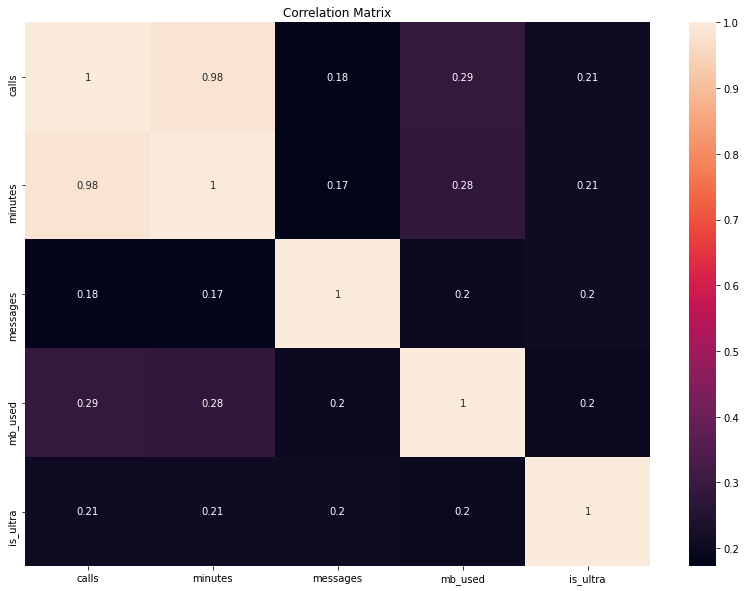

In [11]:
# build and render a correlation matrix
cm = user.corr()  

# plot an annotated heatmap for the correlation matrix

plt.figure(figsize=(14,10))
sns.heatmap(cm, annot = True)

plt.title('Correlation Matrix')

plt.show()

Conclusion: General correlations we can see is that calls and minutes have a very strong correlation. Beyond that there is no strong correlation between any other feature that we can extrapolate.

In [12]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

NameError: name 'features_train' is not defined

<span style="font-family: Arial; font-size: 24px;">Training</span>

In [13]:
# Allowing for 60% split for initial training data
train, valid = train_test_split(user, test_size=0.4, random_state=42)
valid_set, test_set = train_test_split(valid, test_size=0.5, random_state=42)

In [14]:
train.shape

(1928, 5)

In [15]:
valid.shape

(1286, 5)

In [16]:
display(valid_set.shape)
display(test_set.shape)

(643, 5)

(643, 5)

In [17]:
len(train)/len(user)

0.5998755444928439

In [18]:
features_train = train.drop('is_ultra', axis=1)
target_train = train['is_ultra']
print(features_train.shape)
print(target_train.shape)

(1928, 4)
(1928,)


In [19]:
features_valid = valid_set.drop('is_ultra', axis=1)
target_valid = valid_set['is_ultra']
features_test = test_set.drop('is_ultra', axis=1)
target_test = test_set['is_ultra']

In [20]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(1928, 4)
(643, 4)
(643, 4)


In [21]:
dtc_model=DecisionTreeClassifier(random_state=42)
#training on the train
dtc_model=dtc_model.fit(features_train,target_train)

In [22]:
dtc_model

DecisionTreeClassifier(random_state=42)

In [23]:
features_valid

,calls,minutes,messages,mb_used
1198,19.0,185.22,0.0,3839.46
2918,77.0,445.00,100.0,10518.28
2615,51.0,296.04,38.0,22479.57
1745,64.0,421.16,5.0,15757.01
2573,63.0,419.72,0.0,43325.34
...,...,...,...,...
1993,33.0,244.64,0.0,41587.07
589,100.0,706.89,44.0,7800.95
1159,42.0,318.00,71.0,19221.34
3136,31.0,219.84,8.0,9502.52


In [24]:
target_valid

1198    0
2918    1
2615    0
1745    0
2573    1
       ..
1993    1
589     0
1159    0
3136    0
1510    0
Name: is_ultra, Length: 643, dtype: int64

In [25]:
#fitting predictions on the valid
valid_pred=dtc_model.predict(features_valid)
valid_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,

In [26]:
score = dtc_model.score(features_valid, target_valid)
score  

0.7278382581648523

Conclusion: Nearly 73% of the samples in the validation dataset were correctly classified by this mode

In [27]:
dtc_model.tree_.max_depth

27

In [28]:
final_depth = 0
final_score = 0
for depth in range(1, 7):
    dtc_model = DecisionTreeClassifier(random_state=42, max_depth=depth)
    dtc_model.fit(features_train,target_train)
    valid_pred = dtc_model.predict(features_valid)
    accuracy = dtc_model.score(features_valid, target_valid)
    print("Final depth=", depth,"with accuracy:",accuracy)

Final depth= 1 with accuracy: 0.7309486780715396
Final depth= 2 with accuracy: 0.7822706065318819
Final depth= 3 with accuracy: 0.7916018662519441
Final depth= 4 with accuracy: 0.7807153965785381
Final depth= 5 with accuracy: 0.7729393468118196
Final depth= 6 with accuracy: 0.776049766718507


In [29]:
final_depth = 0
final_score = 0
for depth in range(1, 7):
    dtc_model = DecisionTreeClassifier(random_state=42, max_depth=depth)
    dtc_model.fit(features_train,target_train)
    valid_pred = dtc_model.predict(features_valid)
    accuracy = dtc_model.score(features_valid, target_valid)
    if accuracy > final_score:
        final_depth = depth
        final_score = accuracy

print("Final depth=", final_depth,"with training accuracy:",final_score)

Final depth= 3 with training accuracy: 0.7916018662519441


Conclusion: The output indicates that a depth of 3 achieved the highest accuracy of approximately 79.16% on the validation set among the depths tested in this loop. This means, for this specific dataset and this validation split, a tree with a depth of 3 performed the best in terms of accuracy.

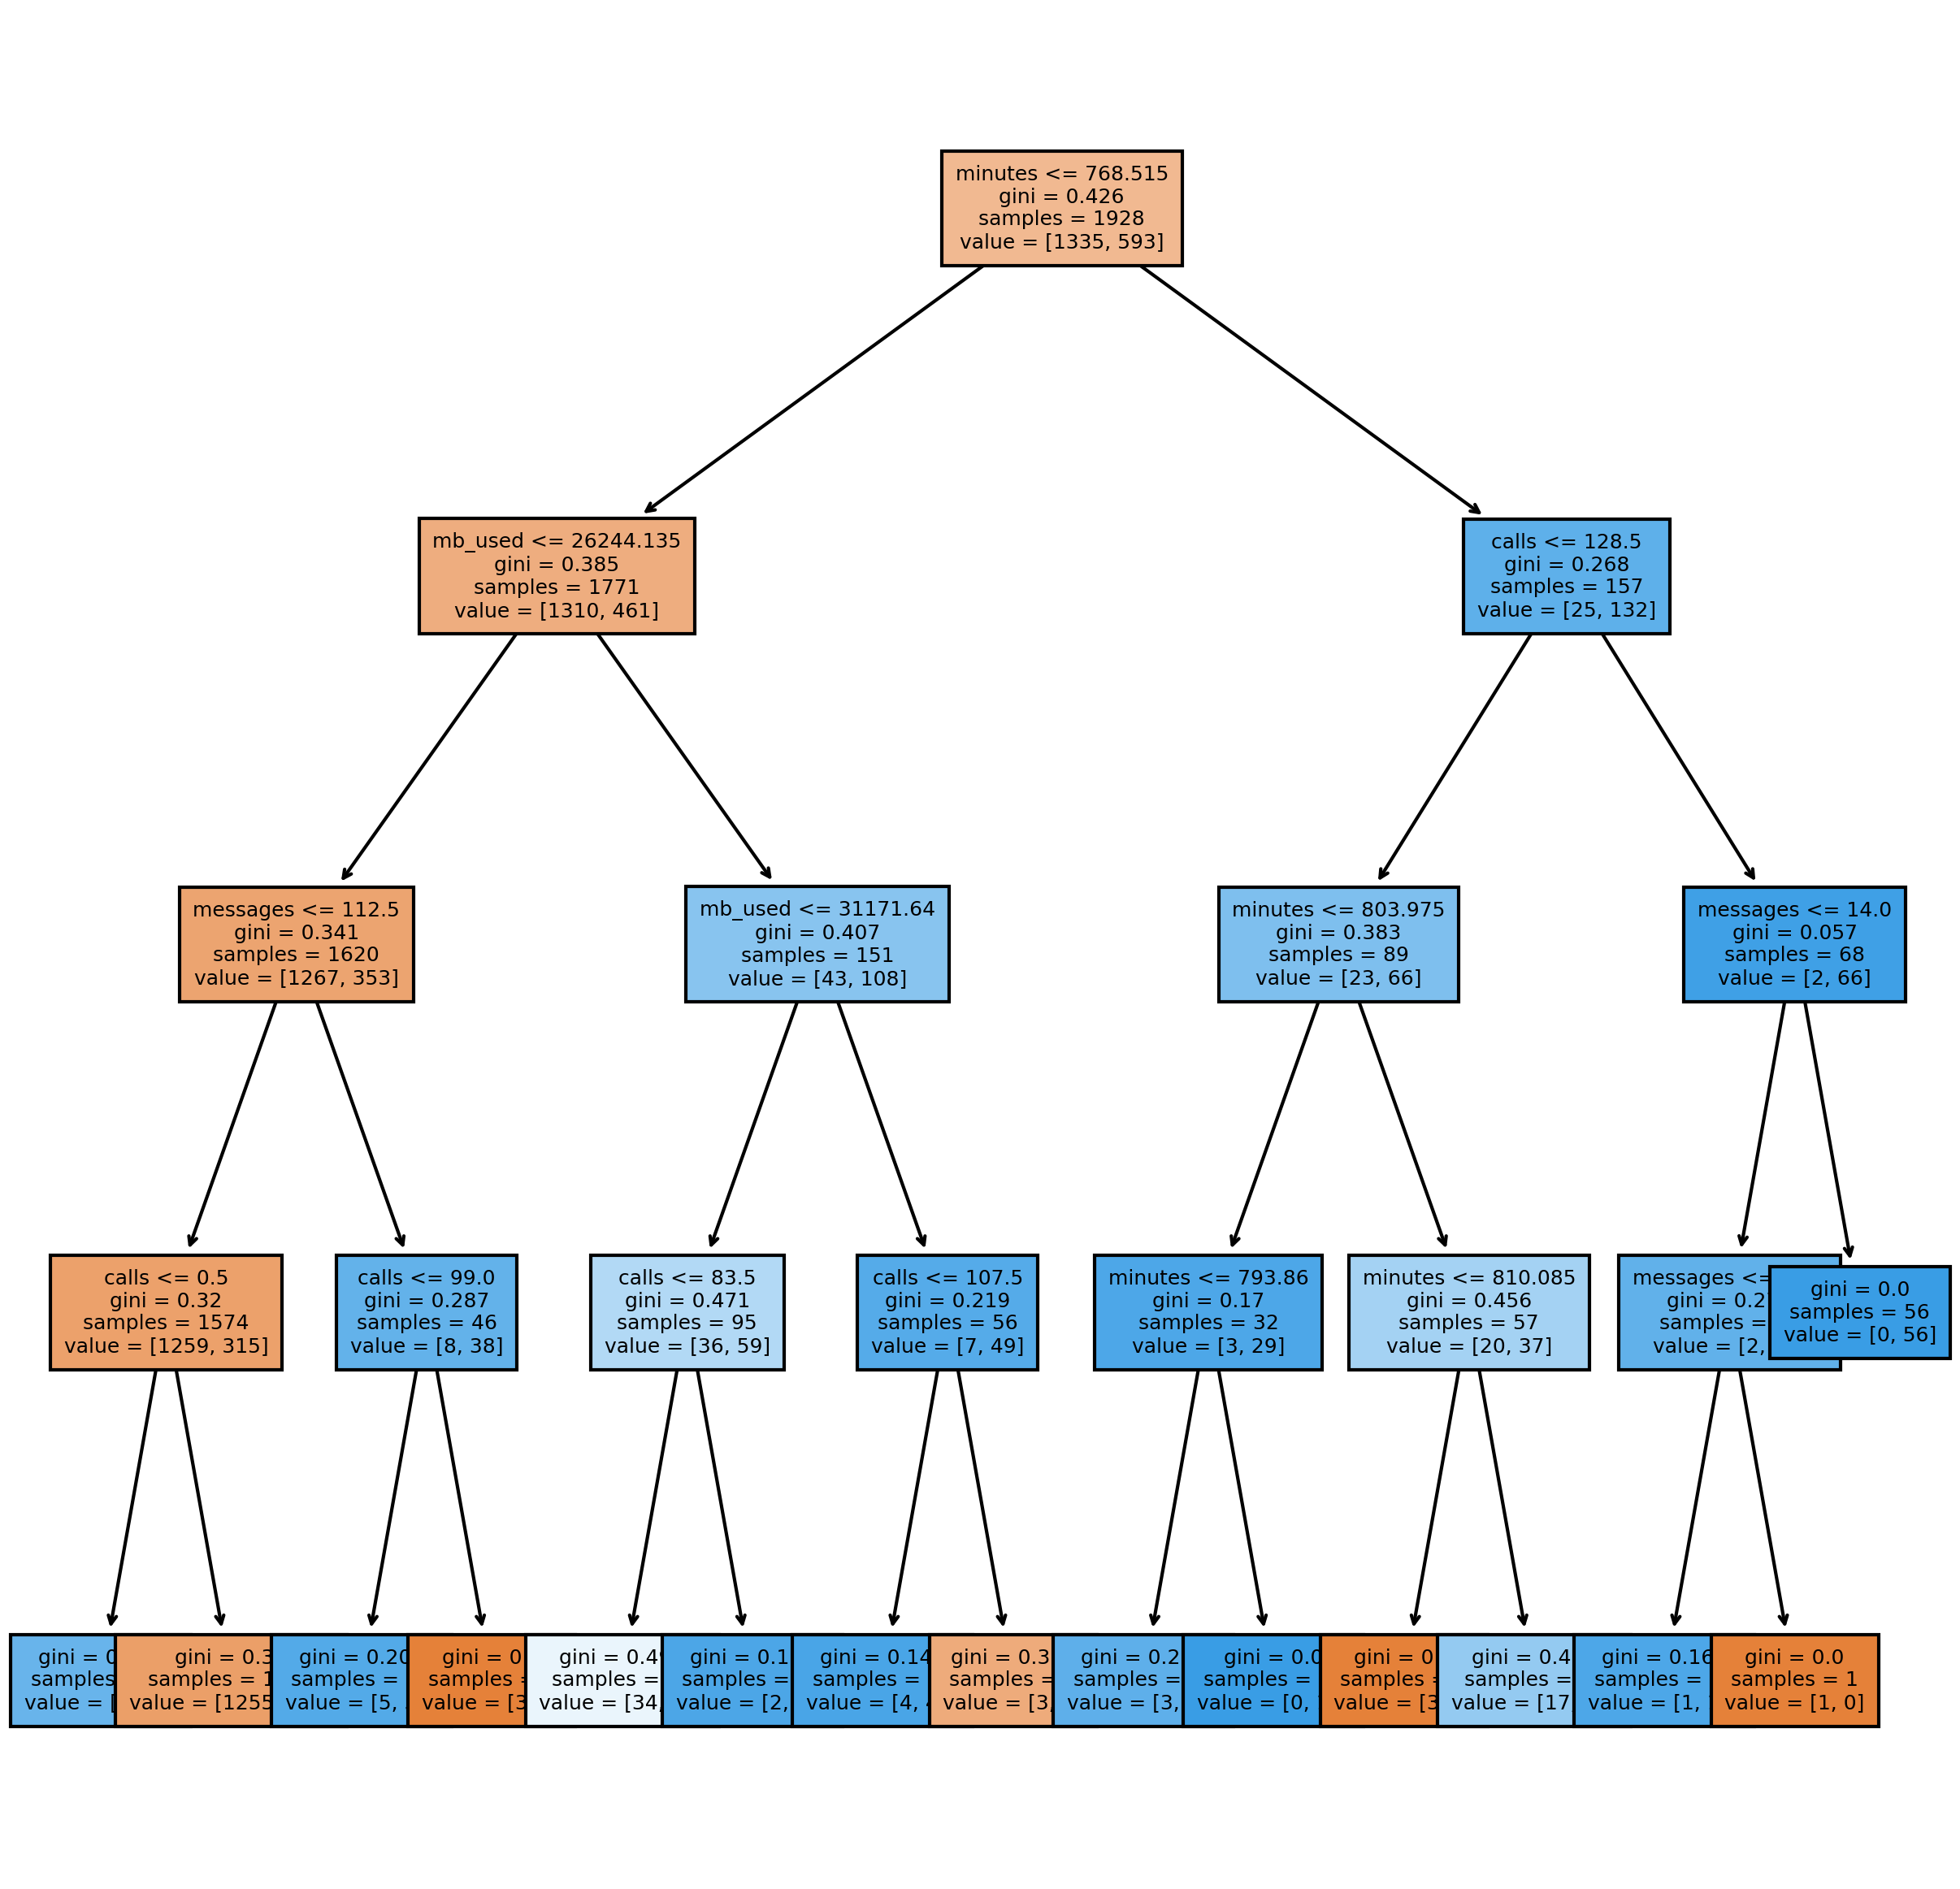

In [30]:
dtc_model = DecisionTreeClassifier(random_state=42, max_depth=4)
dtc_model.fit(features_train,target_train)
valid_pred = dtc_model.predict(features_valid)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10), dpi = 300)
tree.plot_tree(dtc_model,feature_names=features_train.columns,filled=True, fontsize=6);

In [31]:
final_est = 0
final_score = 0
for n in range(1, 50):
    rfc_model = RandomForestClassifier(random_state=42, n_estimators=n)
    rfc_model.fit(features_train,target_train)
    score = rfc_model.score(features_valid, target_valid)
    if score > final_score:
        final_score = score
        best_est = n
    print(n,final_score)

1 0.7153965785381027
2 0.7698289269051322
3 0.7698289269051322
4 0.7916018662519441
5 0.7916018662519441
6 0.7916018662519441
7 0.7916018662519441
8 0.7916018662519441
9 0.7916018662519441
10 0.7916018662519441
11 0.7947122861586314
12 0.7947122861586314
13 0.7947122861586314
14 0.7947122861586314
15 0.7962674961119751
16 0.7978227060653188
17 0.7978227060653188
18 0.7978227060653188
19 0.7978227060653188
20 0.7978227060653188
21 0.7978227060653188
22 0.7978227060653188
23 0.7978227060653188
24 0.7978227060653188
25 0.7978227060653188
26 0.7978227060653188
27 0.7978227060653188
28 0.7978227060653188
29 0.7978227060653188
30 0.7978227060653188
31 0.7978227060653188
32 0.7978227060653188
33 0.7978227060653188
34 0.7978227060653188
35 0.7978227060653188
36 0.7978227060653188
37 0.7978227060653188
38 0.7993779160186625
39 0.7993779160186625
40 0.7993779160186625
41 0.7993779160186625
42 0.7993779160186625
43 0.7993779160186625
44 0.7993779160186625
45 0.7993779160186625
46 0.79937791601866

In [32]:
final_est = 0
final_score = 0
for n in range(1, 50):
    rfc_model = RandomForestClassifier(random_state=42, n_estimators=n)
    rfc_model.fit(features_train,target_train)
    score = rfc_model.score(features_valid, target_valid)
    if score > final_score:
        final_score = score
        best_est = n
print("Best number of estimators=", n, "with accuracy:",final_score)

Best number of estimators= 49 with accuracy: 0.7993779160186625


Conclusion:
The output indicates that with 49 estimators, the highest accuracy of approximately 79.94% on the validation set among the range of estimators tested in this loop.

In [33]:
lr_model = LogisticRegression(random_state=42, solver='liblinear')
lr_model.fit(features_train,target_train)
score = lr_model.score(features_valid, target_valid)
print("Logistic regression training score:", score)

Logistic regression training score: 0.7200622083981337


In [34]:
predictions_test = lr_model.predict(features_test)                 
accuracy_test = accuracy_score(target_test, predictions_test)    

In [35]:
print("Logistic regression testing score:", accuracy_test)

Logistic regression testing score: 0.7091757387247278


In [36]:
cm = confusion_matrix(target_test, predictions_test)

In [37]:
cm

array([[438,  10],
       [177,  18]])

In [38]:
TP = cm[1, 1]
FP = cm[0, 1]
FN= cm[1, 0]
TN=cm[0,0]

In [39]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)

In [40]:
print("precision:",precision)
print("recall:",recall)

precision: 0.6428571428571429
recall: 0.09230769230769231


   The low recall score (9.23%) suggests that the model struggles to correctly identify a significant portion of the positive instances in the dataset. It misses a large proportion of actual positive cases.
    However, the moderate precision score (64.29%) implies that when the model predicts a positive outcome, it's accurate most of the time.

<span style="font-family: Arial; font-size: 24px;">Validation</span>

In [41]:
# split the remaining data into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.3, random_state=42)

model = LogisticRegression()

# Train using the training set
model.fit(X_train, y_train)

# Predict the validation set
val_predictions = model.predict(X_val)

val_accuracy = accuracy_score(y_val, val_predictions)
print(f'Validation Accuracy: {val_accuracy}')

Validation Accuracy: 0.7473309608540926


Conclusion: Our Validation comes to about 74.7% this represents a fairly accurate model for us to bring further toward testing.

<span style="font-family: Arial; font-size: 24px;">Test</span>

In [42]:
# Predict on the test set
test_predictions = model.predict(X_test)

# Evaluate the performance of model on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.7598343685300207


Conclusion: Our test data meets 76% accuracy which does make me believe this is an overall consistent model with validation and unseen data.

<span style="font-family: Arial; font-size: 24px;">Conclusion</span>

Based off the data we can see that our model is fairly accurate as it managed to reach 76% and very closely aligns with our validation set in terms of accuracy. Additionally from our test phases we do know that we have very accurate precision data at 64%. Despite our recall data not being very strong at 9% we can say this program is overall a success and should provide us accuracy in determining which is the best phone plan for our consumers. In general for the future one of the main focuses we can rely on is improving our recall data to provide a more accurate model. I believe with what we have currently provided however we can generally advise our consumers on whether they should go with our Ultra or Smart Plan.